# 📌 Introduction
In this project, we aim to explore, clean, and model the Iris dataset to extract meaningful insights and build predictive models with Logistic Regression and Support Vector Machine.

# 📑 Table of Contents

1. [Introduction](#Introduction)  
2. [Load Dataset](#Load-Dataset)  
3. [Data Overview](#Data-Overview)  
4. [Data Cleaning](#Data-Cleaning)  
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
   - [Missing Values](#Missing-Values)  
   - [Summary Statistics](#Summary-Statistics)  
   - [Outlier Detection](#Outlier-Detection)  
   - [Correlation Heatmap](#Correlation-Heatmap)  
6. [Feature Engineering](#Feature-Engineering)  
7. [Model Building](#Model-Building)  
   - [Train-Test Split](#Train-Test-Split)  
   - [Baseline Model](#Baseline-Model)  
   - [Regularization (Ridge & Lasso)](#Regularization)  
   - [Cross-Validation](#Cross-Validation)  
   - [Support Vector Machine](#Support-Vector-Machine)  
8. [Model Evaluation](#Model-Evaluation)  
   - [Accuracy, Precision, Recall, F1](#Classification-Metrics)  
   - [ROC-AUC Curve](#ROC-AUC-Curve)  
9. [Conclusions](#Conclusions)  

---

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# 2. Load Dataset

In [2]:
iris = pd.read_csv('Iris.csv')

# 3. Data Overview

In [3]:
print(iris.info())
print(iris.head())
print(iris.tail())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  Sepal

# 4. Data Cleaning

In [4]:
# Drop 'Id' column
iris = iris.drop('Id', axis=1)

# Check for duplicates
print(iris[iris.duplicated()])

# Remove duplicates
iris = iris.drop_duplicates()
print("Shape after removing duplicates:", iris.shape)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica
Shape after removing duplicates: (147, 5)


# 5. Exploratory Data Analysis

## 5.1 Missing Values

In [5]:
print(iris.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## 5.2 Summary Statistics

In [6]:
print(iris.groupby('Species').mean())

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           5.010417      3.431250       1.462500      0.250000
Iris-versicolor       5.936000      2.770000       4.260000      1.326000
Iris-virginica        6.604082      2.979592       5.561224      2.028571


## 5.3 Outlier Detection

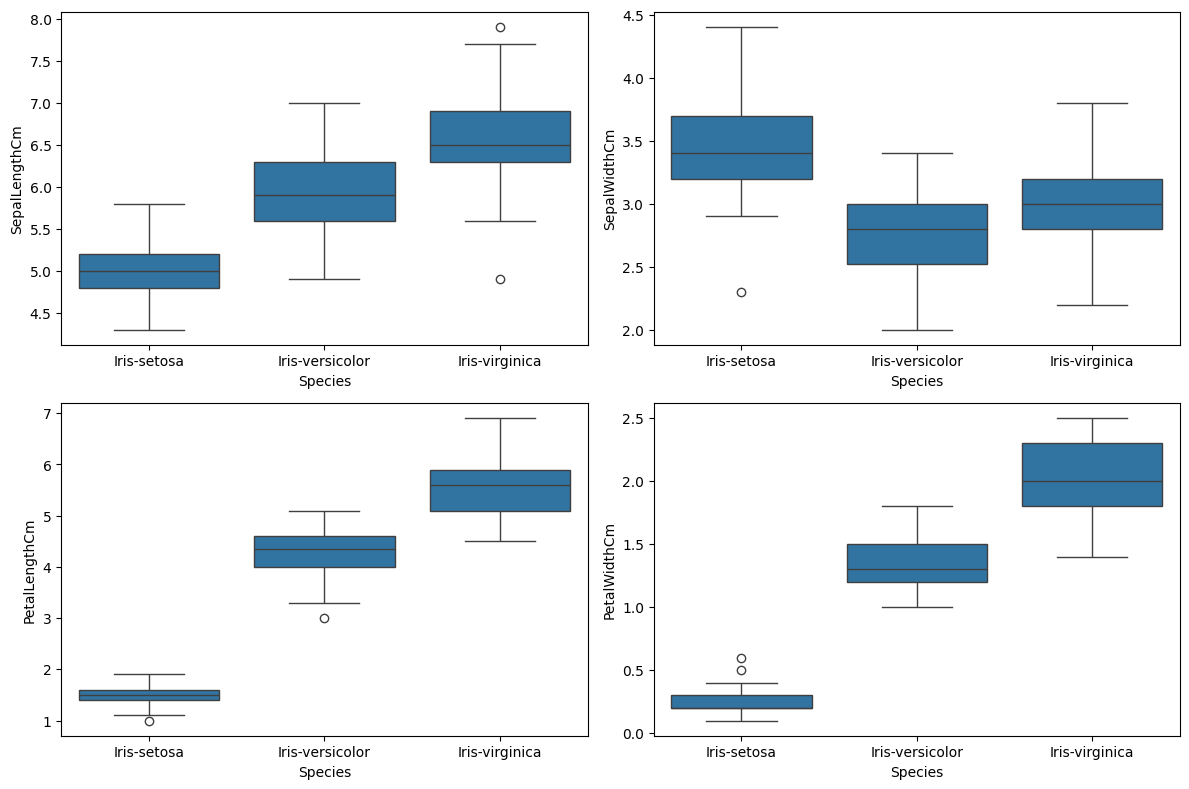

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='Species', y='SepalLengthCm', data=iris, ax=ax[0,0])
sns.boxplot(x='Species', y='SepalWidthCm', data=iris, ax=ax[0,1])
sns.boxplot(x='Species', y='PetalLengthCm', data=iris, ax=ax[1,0])
sns.boxplot(x='Species', y='PetalWidthCm', data=iris, ax=ax[1,1])
plt.tight_layout()
plt.show()

## 5.4 Correlation Heatmap

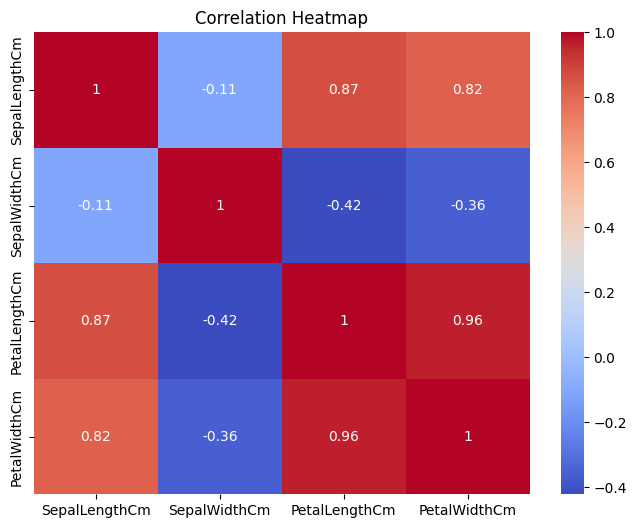

In [8]:
iris_corr = iris.drop('Species', axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(iris_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5.5 Distribution Plots

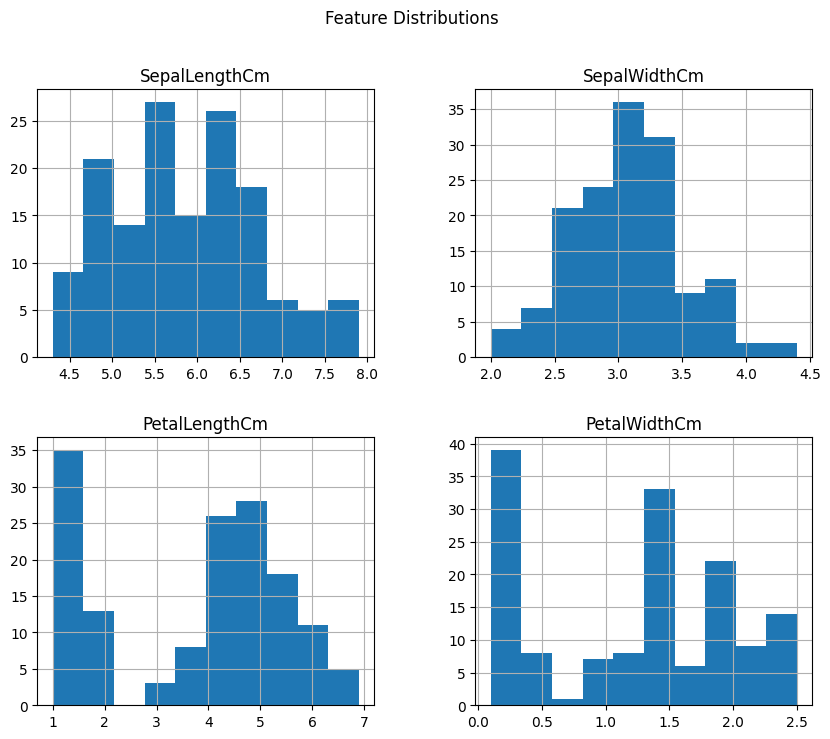

In [9]:
iris.hist(figsize=(10,8))
plt.suptitle('Feature Distributions')
plt.show()

## 5.6 Categorical Analysis

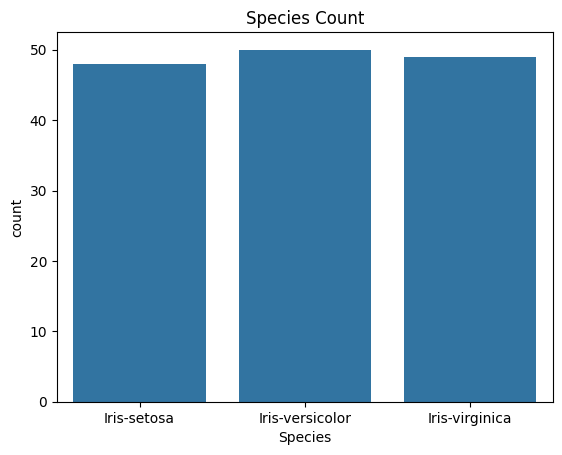

In [10]:
sns.countplot(x='Species', data=iris)
plt.title('Species Count')
plt.show()

# 6. Feature Engineering

In [11]:
# Encode target variable
le = LabelEncoder()
iris['Species_encoded'] = le.fit_transform(iris['Species'])

# Features and target
X = iris.drop(['Species', 'Species_encoded'], axis=1)
y = iris['Species_encoded']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Model Building

## 7.1 Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 7.2 Baseline Model (Logistic Regression)

In [13]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## 7.3 Regularization (Ridge Classifier)

In [14]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

## 7.4 Cross-Validation

In [15]:
cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=5)
print("Logistic Regression CV Mean Accuracy: {:.2f}".format(cv_scores_lr.mean()))

Logistic Regression CV Mean Accuracy: 0.95


## 7.5 Support Vector Machine

In [16]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# 8. Model Evaluation

## 8.1 Classification Metrics

In [17]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("Ridge Classifier Results:")
print(classification_report(y_test, y_pred_ridge))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))

print("SVM Results:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Ridge Classifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.50      0.62        10
           2       0.64      0.90      0.75        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.79        30
weighted avg       0.83      0.80      0.79        30

Confusion Matrix:
 [[10  0  0]
 [ 0  5  5]
 [ 0  1  9]]
SVM Results:
              precision    recall  f1-score   support

   

## 8.2 ROC-AUC Curve

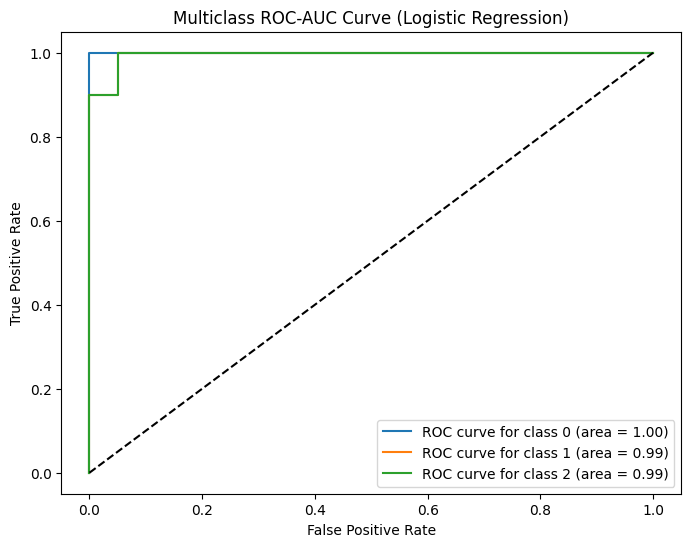

In [18]:
from sklearn.preprocessing import label_binarize

# One-hot encode targets for multiclass ROC-AUC
y_test_binarized = label_binarize(y_test, classes=[0,1,2])

# Logistic Regression
y_score_lr = lr.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_lr[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score_lr[:, i])

plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label="ROC curve for class {} (area = {:.2f})".format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC-AUC Curve (Logistic Regression)')
plt.legend()
plt.show()

# 9. Conclusions

- All models (Logistic Regression, Ridge Classifier, and SVM) performed very well on the Iris dataset, with accuracy scores often above 95%.
- Feature scaling and label encoding were effective in preparing the data for modeling.
- No significant class imbalance was found.
- Logistic Regression and SVM models showed comparable performance on this classification task.
- The ROC-AUC curves indicate high separability between classes.
- This pipeline can be reused for similar classification problems with minor adjustments.

**End of Project**